## Bienvenidos a al ambiente de ejecución de código Colab!!!

# Presentación del Dataset Iris

En el presente ejemplo comenzaremos con un dataset **público** utilizado para la formación de **Machine Learning** denominado Iris dataset que se basa en describir las longitudes del sépalo y pétalo de tres tipos de flores: setosa, virginica y versicolor. Este dataset es uno de los más básicos y usados para introducirnos en el mundo de la ciencia de datos.

Podemos ver una breve historia de este dataset [acá](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)

In [1]:
#Importamos librerías útiles
import pandas as pd #Es una librería para manipulación de datos
import seaborn as sns  #Es una librería para poder hacer nuestros gráficos rápidos y atractivos

In [8]:
#Asignamos la variable iris 
iris = pd.read_csv('https://raw.githubusercontent.com/javalpe/datasets/master/iris.csv')

In [9]:
#Mostramos los primeros cinco (5) registros del dataset iris con la instrucción head. Este número se muestra por defecto
iris.head() 

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,tipo_flor
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Como resultado hemos obtenido 5 filas con las observaciones de las características de los pétalos y el sépalo.
    Hay una columna a la izquierda (**en negrita**) que hace referencia a la posición de cada fila. A esto se le llama index (índice) y nos servirá para ubicar más rápidos nuestros datos. 
Hay una columna a la derecha denominada **tipo_flor** que asigna el tipo de flor de cada observación. Esta columna es importante porque será la **variable objetivo** que vamos a predecir o tratar de acercarnos usando el algoritmo de **clustering**

In [10]:
#Para visualizar la lista de estadísticos básicos utilizamos el método describe
iris.describe()

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo
count,100.000000,100.000000,100.000000,100.00000
mean,5.914000,3.041000,3.851000,1.21300
std,0.856469,0.439489,1.785378,0.74558
min,4.300000,2.000000,1.000000,0.10000
25%,5.175000,2.800000,1.600000,0.37500
50%,5.850000,3.000000,4.500000,1.40000
75%,6.500000,3.300000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


In [11]:
#Si deseamos una vista resumida de todas las variables de nuestro dataset utilizamos el método info
iris.info()
#float, object, integer, hay más...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   largo_sepalo  100 non-null    float64
 1   ancho_sepalo  100 non-null    float64
 2   largo_petalo  100 non-null    float64
 3   ancho_petalo  100 non-null    float64
 4   tipo_flor     100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


Estos descriptivos verifican que las cuatro variables almacenan **100 observaciones**, todas ellas con datos numéricos. Para este ejemplo no contamos con datos *categóricos* (no numéricos) y tampoco aparecen vacíos o errores.

# Tratamiento de la Data

Identificamos como **variable objetivo** (target): 'tipo_flor'. Las demás variables serán las **predictoras** (features) para el modelo.

In [17]:
#Creamos una variable X_iris para guardar el resultado de eliminar la columna tipo_flor del dataset iris
X_iris = iris.drop('tipo_flor', axis=1) 
#axis = 1 es para las columnas, axis = 0 es para las filas.

In [18]:
#Creamos una variable y_iris para guardar la columna tipo_flor del dataset iris
y_iris = iris['tipo_flor']

In [34]:
#Para visualizar el tamaño del dataset utilizamos el método shape, como resultado obtenemos el números de filas y columnas (en este orden)
X_iris.shape, y_iris.shape

((100, 4), (100,))

## Haremos PCA para visulizar cómo se agrupa de manera intuitiva


Para aplicar el modelo de *clustering* vamos a realizar una **reducción de dimensionalidad** donde las variables predictoras se reducen a solo dos (2) PCA -que son las iniciales de *Principal Component Analysis*- de esta manera vamos a visualizar el dataset iris en función de solo dos *nuevas variables predictoras* denominadas PCA1 y PCA2

In [21]:
#Importamos la librería PCA
from sklearn.decomposition import PCA

#Creamos  una variable feature_pca para asignar PCA, definimos el valor de n_components para limitar a dos las variables finales
features_pca = PCA(n_components=2)

In [22]:
#Adaptamos la variable creada feature_pca con la data guardada en X_iris
features_pca.fit(X_iris)

#Creamos una variable X_2D para guardar este último cambio
X_2D = features_pca.transform(X_iris)

Para visualizar el resultado de la reducción usamos nuevamente el método **scatterplot** del seaborn (sns). Previamente añadimos al dataset iris las dos dimensiones ya obtenidas: PCA 1 y PCA 2

In [24]:
#Añadimmos una columna denominada PCA1 al dataset iris usando la columna 0 de la variable X_2D, es decir la primera columna contando de izquierda a derecha
iris['PCA1'] = X_2D[:, 0]

#Añadimmos una columna denominada PCA2 al dataset iris usando la columna 1 de la variable X_2D, es decir la segunda columna contando de izquierda a derecha
iris['PCA2'] = X_2D[:, 1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


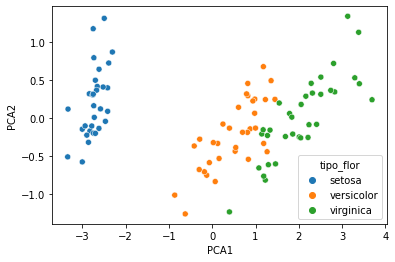

In [32]:
#Finalmente usamos el método scatterplot para graficar ambas dimensiones, ahora nuestro dataset iris tiene dos nuevas columnas PCA1 y PCA2
x =iris['PCA1']
y= iris['PCA2']
sns.scatterplot(x, y,hue='tipo_flor',data=iris)

# Selección y preparación del modelo

Ahora vamos a seleccionar un **modelo de clustering o agrupamiento** denominado *Kmeans*.

In [25]:
#Importamos la librería KMeans
from sklearn.cluster import KMeans

#Creamos una variable kmeans para guardar el modelo Kmeans
#Definimos los parámetros n_clusters para limitar solo tres agrupamientos, también podemos definir el máximo de iteraciones con max_iter
kmeans = KMeans(n_clusters=3, max_iter=600)

In [26]:
#Adaptamos el modelo kmeans con las variables predictoras, en nuestro ejemplo serían los datos guardados en X_iris
kmeans = kmeans.fit(X_iris)

In [27]:
#Creamos una variable predicciones para guardar las predicciones generadas por el modelo kmeans
predicciones = kmeans.predict(X_iris)

In [28]:
predicciones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2], dtype=int32)

Para visualizar el resultado de la predicción usamos nuevamente el método **scatterplot** del seaborn (sns). Previamente añadimos al dataset iris las predicciones  ya obtenidas en una nueva columna llamada **'predicciones'**

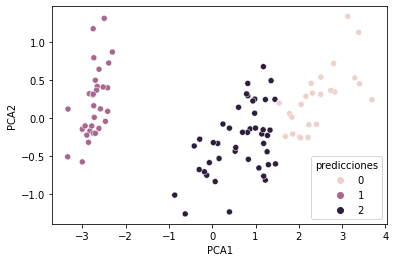

In [33]:
iris['predicciones'] = predicciones
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predicciones',data = iris)

Finalmente hemos comprobado que la visualización obtenida por el PCA (reduciendo las 4 columnas a solamente 2) es bastante similar a la visualización obtenida con el modelo de **clustering** (prediciendo los tipo_flor en la columna predicciones).